In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h2>The Tanks Problem</h2>
<p>Given the observation of train 60 - how many trains are there in the company? Assuming uniform prior</p>

In [4]:
def prob_calc_uni(N,data):
    probs = pd.DataFrame(columns=['Size','Prior','likelihood','Post'])
    probs['Size'] = [i for i in range(1,N+1)]
    probs['Post'] = 1
    for obs in data:
        probs['Prior'] = (1/probs['Size'])**1
        probs['likelihood'] = 0
        probs.loc[probs['Size']>=obs,'likelihood'] = probs['Prior'] 
        probs['Post'] = (probs['Post']*probs['likelihood'])/(probs['Post']*probs['likelihood']).sum() 
    return probs

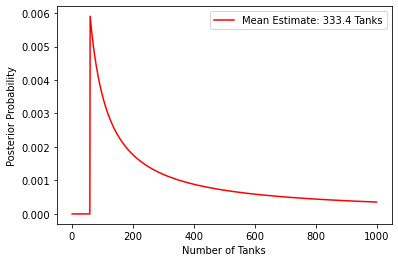

In [5]:
probs = prob_calc_uni(1000,[60])
plt.plot(probs['Size'],probs['Post'],'r-',label="Mean Estimate: %0.1f Tanks"%(probs['Size']*probs['Post']).sum())
plt.xlabel('Number of Tanks')
plt.ylabel('Posterior Probability')
plt.legend()
plt.savefig('tank_estimate_uniform.png')
plt.show()

<p>Now draw from a power law<p>

In [6]:
def prob_calc_pow(N,data):
    probs = pd.DataFrame(columns=['Size','Prior','likelihood','Post'])
    probs['Size'] = [i for i in range(1,N+1)]
    probs['Post'] = 1
    for obs in data:
        probs['Prior'] = (1/probs['Size'])**2
        probs['likelihood'] = 0
        probs.loc[probs['Size']>=obs,'likelihood'] = probs['Prior'] 
        probs['Post'] = (probs['Post']*probs['likelihood'])/(probs['Post']*probs['likelihood']).sum() 
    return probs

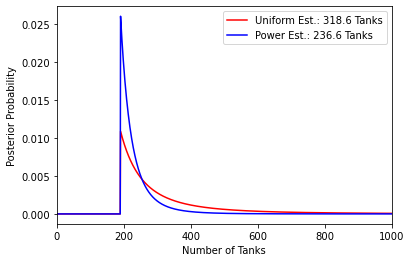

In [7]:
probsp = prob_calc_pow(1000,[60,190,110])
probsu = prob_calc_uni(1000,[60,190,110])
plt.plot(probsu['Size'],probsu['Post'],'r-',label="Uniform Est.: %0.1f Tanks"%(probsu['Size']*probsu['Post']).sum())
plt.plot(probsp['Size'],probsp['Post'],'b-',label="Power Est.: %0.1f Tanks"%(probsp['Size']*probsp['Post']).sum())
plt.xlabel('Number of Tanks')
plt.ylabel('Posterior Probability')
plt.gca().set_xlim(0,1000)
plt.legend()
plt.savefig('tank_estimate_powercomp.png')
plt.show()

In [8]:
probsu = prob_calc_pow(500,[60,190,110])
print("Uniform Est.: %0.1f Tanks"%(probsu['Size']*probsu['Post']).sum())

Uniform Est.: 233.8 Tanks


<h2>Website A/B Testing</h2>

In [28]:
from numpy.random import dirichlet

In [59]:
N_A = 987
N_A_79 = 10
N_A_49 = 46
N_A_25 = 80
N_A_0 = N_A - (N_A_79+N_A_49+N_A_25)
obs_A = np.array([N_A_79,N_A_49,N_A_25,N_A_0])
N_B = 1734
N_B_79 = 45
N_B_49 = 73
N_B_25 = 165
N_B_0 = N_B - (N_B_79+N_B_49+N_B_25)
obs_B = np.array([N_B_79,N_B_49,N_B_25,N_B_0])
#calculate the posteriors
prior_parameters = np.array([1,1,1,1])
post_samp_A = dirichlet(prior_parameters+obs_A,size=20000)
post_samp_B = dirichlet(prior_parameters+obs_B,size=20000)

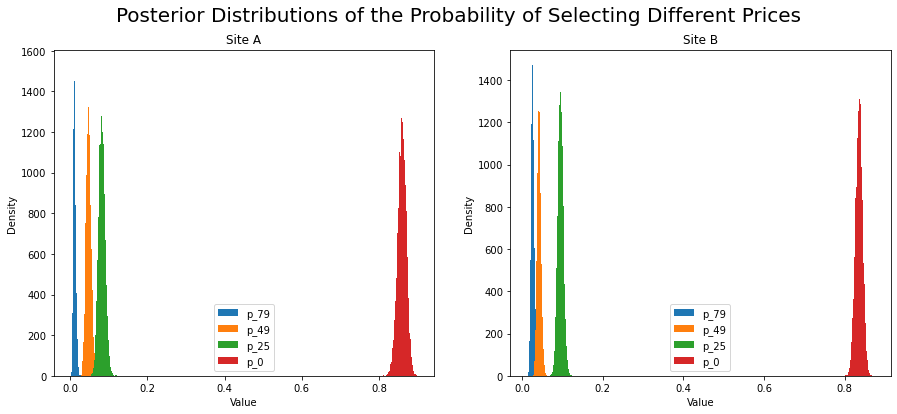

In [33]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(121)
for i,label in enumerate(['p_79','p_49','p_25','p_0']):
    ax = plt.hist(post_samp_A[:,i],bins=50,label=label,histtype='stepfilled')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("Site A")
plt.legend()
ax = fig.add_subplot(122)
for i,label in enumerate(['p_79','p_49','p_25','p_0']):
    ax = plt.hist(post_samp_B[:,i],bins=50,label=label,histtype='stepfilled')
plt.xlabel('Value')
plt.ylabel('Density')
plt.suptitle("Posterior Distributions of the Probability of Selecting Different Prices", fontsize=20)
plt.title("Site B")
plt.legend()
plt.savefig('postdist.png')
plt.show()


In [34]:
def expected_revenue(P):
    return 79*P[:,0]+49*P[:,1]+25*P[:,2]+0*P[:,3]

In [35]:
postA_revenue = expected_revenue(post_samp_A)
postB_revenue = expected_revenue(post_samp_B)

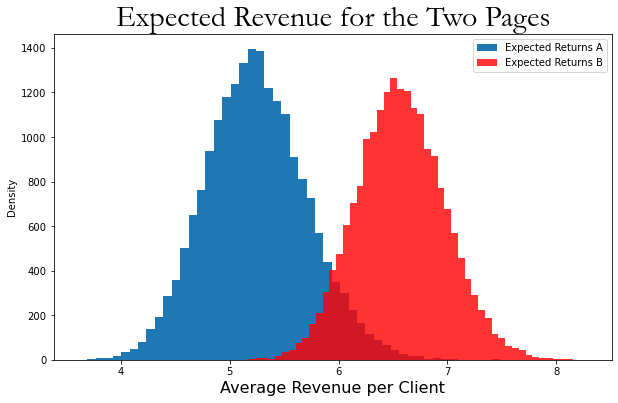

In [36]:
plt.figure(figsize=(10,6))
plt.hist(postA_revenue,histtype='stepfilled',label='Expected Returns A',bins=50)
plt.hist(postB_revenue,histtype='stepfilled',label='Expected Returns B',bins=50,color='red',alpha=0.8)
plt.xlabel('Average Revenue per Client',fontsize=16)
plt.ylabel('Density')
plt.legend()
plt.title('Expected Revenue for the Two Pages',font='Garamond',fontsize=30)
plt.savefig('ExpectedRevenue.png')
plt.show()

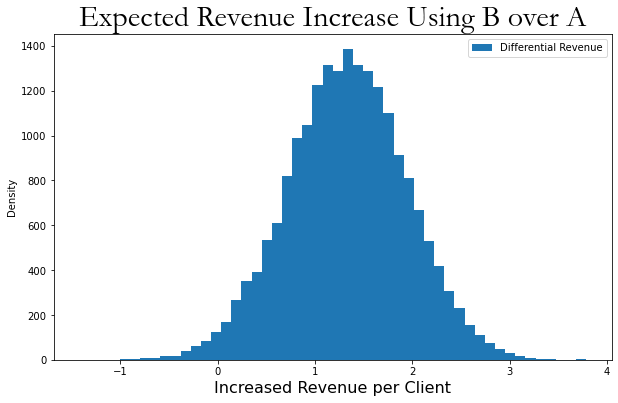

In [37]:
plt.figure(figsize=(10,6))
plt.hist(postB_revenue-postA_revenue,histtype='stepfilled',label='Differential Revenue',bins=50)
plt.xlabel('Increased Revenue per Client',fontsize=16)
plt.ylabel('Density')
plt.legend()
plt.title('Expected Revenue Increase Using B over A',font='Garamond',fontsize=30)
plt.savefig('ExpectedRevenueInc.png')
plt.show()

In [38]:
def rel_inc(a,b):
    return (a-b)/b

In [39]:
lift = rel_inc(postB_revenue,postA_revenue)

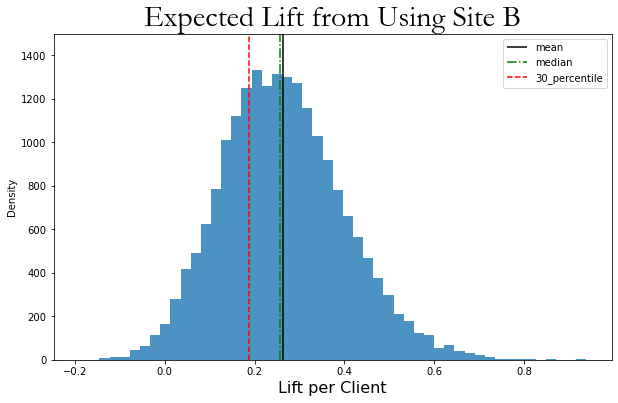

In [43]:
plt.figure(figsize=(10,6))
plt.hist(lift,histtype='stepfilled',bins=50,alpha=0.8)
plt.xlabel('Lift per Client',fontsize=16)
plt.ylabel('Density')
plt.title('Expected Lift from Using Site B',font='Garamond',fontsize=30)
plt.vlines(lift.mean(),0,1500,color='k',linestyles='-',label='mean')
plt.vlines(np.median(lift),0,1500,color='g',linestyles='-.',label='median')
plt.vlines(np.percentile(lift,30),0,1500,color='r',linestyles='--',label='30_percentile')
plt.gca().set_ylim(0,1500)
plt.legend()
plt.savefig('Lift.png')
plt.show()

<h2>What if our distributions are greatly reduced?</h2>

In [51]:
N_A = 490
N_A_79 = 2
N_A_49 = 8
N_A_25 = 16
N_A_0 = N_A - (N_A_79+N_A_49+N_A_25)
obs_A = np.array([N_A_79,N_A_49,N_A_25,N_A_0])

In [52]:
N_B = 850
N_B_79 = 7
N_B_49 = 14
N_B_25 = 32
N_B_0 = N_B - (N_B_79+N_B_49+N_B_25)
obs_B = np.array([N_B_79,N_B_49,N_B_25,N_B_0])

In [53]:
prior_parameters = np.array([1,1,1,1])
post_samp_A = dirichlet(prior_parameters+obs_A,size=20000)
post_samp_B = dirichlet(prior_parameters+obs_B,size=20000)

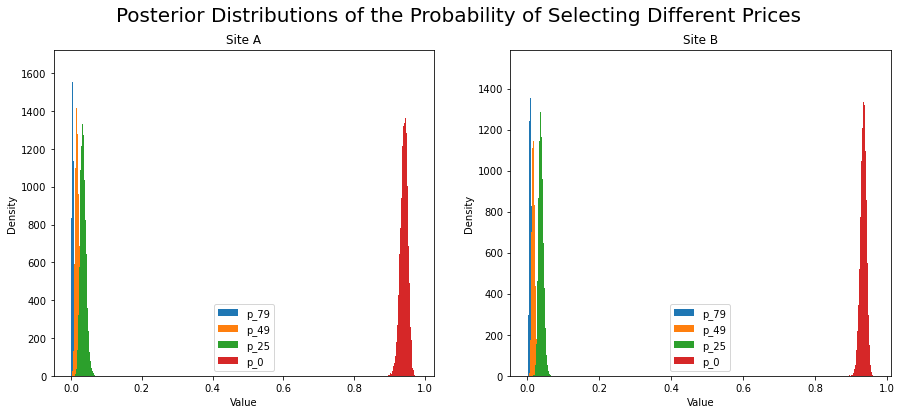

In [54]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(121)
for i,label in enumerate(['p_79','p_49','p_25','p_0']):
    ax = plt.hist(post_samp_A[:,i],bins=50,label=label,histtype='stepfilled')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("Site A")
plt.legend()
ax = fig.add_subplot(122)
for i,label in enumerate(['p_79','p_49','p_25','p_0']):
    ax = plt.hist(post_samp_B[:,i],bins=50,label=label,histtype='stepfilled')
plt.xlabel('Value')
plt.ylabel('Density')
plt.suptitle("Posterior Distributions of the Probability of Selecting Different Prices", fontsize=20)
plt.title("Site B")
plt.legend()
plt.savefig('postdist.png')
plt.show()


In [55]:
postA_revenue = expected_revenue(post_samp_A)
postB_revenue = expected_revenue(post_samp_B)

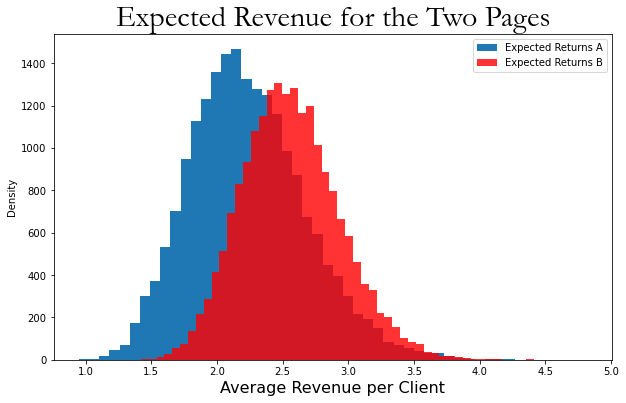

In [56]:
plt.figure(figsize=(10,6))
plt.hist(postA_revenue,histtype='stepfilled',label='Expected Returns A',bins=50)
plt.hist(postB_revenue,histtype='stepfilled',label='Expected Returns B',bins=50,color='red',alpha=0.8)
plt.xlabel('Average Revenue per Client',fontsize=16)
plt.ylabel('Density')
plt.legend()
plt.title('Expected Revenue for the Two Pages',font='Garamond',fontsize=30)
plt.savefig('ExpectedRevenue.png')
plt.show()

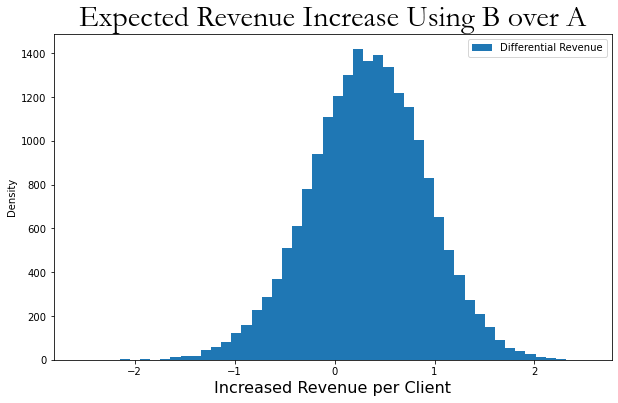

In [57]:
plt.figure(figsize=(10,6))
plt.hist(postB_revenue-postA_revenue,histtype='stepfilled',label='Differential Revenue',bins=50)
plt.xlabel('Increased Revenue per Client',fontsize=16)
plt.ylabel('Density')
plt.legend()
plt.title('Expected Revenue Increase Using B over A',font='Garamond',fontsize=30)
plt.savefig('ExpectedRevenueInc.png')
plt.show()

In [68]:
percent_better={}
for i in range(10,0,-1):
    N_A = int(987/i)
    N_A_79 = int(10/i)
    N_A_49 = int(46/i)
    N_A_25 = int(80/i)
    N_A_0 = N_A - (N_A_79+N_A_49+N_A_25)
    obs_A = np.array([N_A_79,N_A_49,N_A_25,N_A_0])
    N_B = int(1734/i)
    N_B_79 = int(45/i)
    N_B_49 = int(73/i)
    N_B_25 = int(165/i)
    N_B_0 = N_B - (N_B_79+N_B_49+N_B_25)
    obs_B = np.array([N_B_79,N_B_49,N_B_25,N_B_0])
    #calculate the posteriors
    prior_parameters = np.array([1,1,1,1])
    post_samp_A = dirichlet(prior_parameters+obs_A,size=20000)
    post_samp_B = dirichlet(prior_parameters+obs_B,size=20000)
    postA_revenue = expected_revenue(post_samp_A)
    postB_revenue = expected_revenue(post_samp_B)
    percent_better[N_A+N_B] = (postB_revenue>postA_revenue).mean()

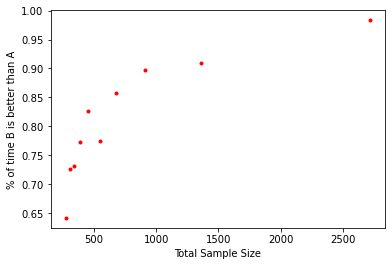

In [70]:
plt.plot(percent_better.keys(),percent_better.values(),'r.')
plt.xlabel('Total Sample Size')
plt.ylabel('% of time B is better than A')
plt.savefig('impactofss.png')
plt.show()